# Visualization of accident patterns in Kiel<br>
## Muzammil Mushtaq<br>



**Introduction:**

In the pursuit of enhancing road safety within the city of Kiel, the municipality has recognized the importance of harnessing the power of data to understand and address accident patterns. As a data scientist, my mission is to delve into the wealth of information available regarding accidents in Kiel, extracting meaningful insights that can guide strategic interventions and mitigate potential risks on the road.

Accidents are complex events influenced by various factors, including weather conditions, time of day, road infrastructure, and driver behavior. By applying advanced analytics and machine learning techniques to relevant datasets, I aim to uncover patterns, trends, and correlations that shed light on the root causes of accidents. These insights will not only aid in understanding the current state of road safety in Kiel but will also serve as a foundation for the development of proactive measures to prevent future accidents.

Through the lens of data science, we can identify high-risk zones, discern patterns associated with different types of accidents, and propose evidence-based strategies to enhance overall road safety. The collaboration between data science and municipal stakeholders is pivotal in fostering a safer environment for both residents and commuters. By leveraging data-driven decision-making, we strive to create a comprehensive and targeted approach to accident prevention, ensuring that our roads become safer and more secure for all.

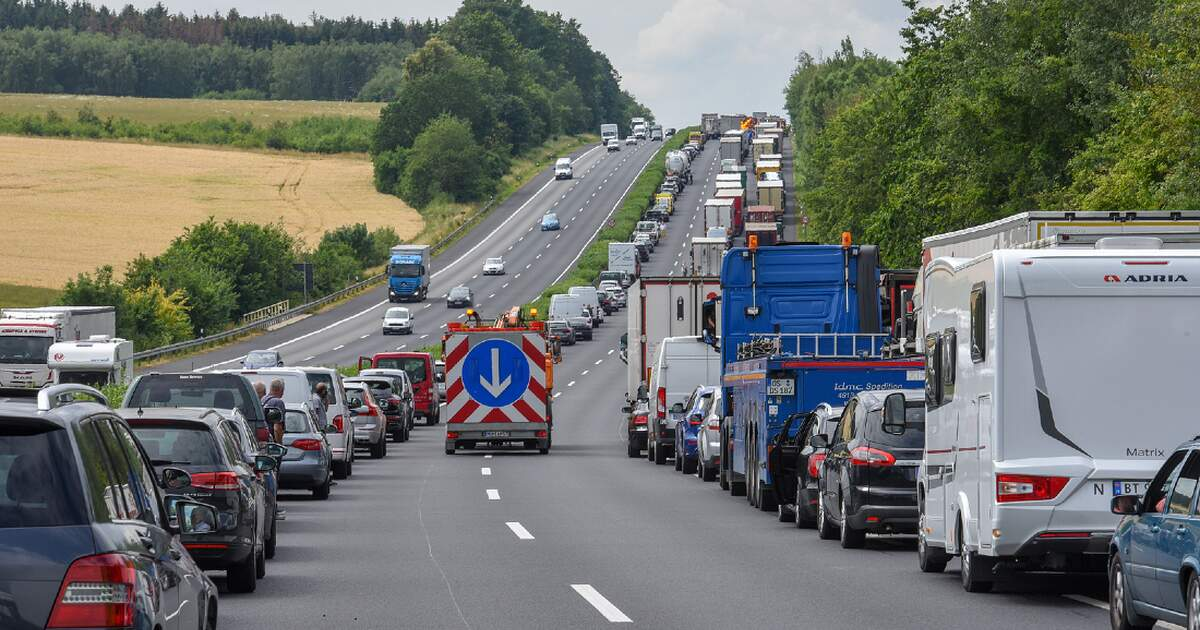

### Task 1
    1) Read and convert the geojson files into geopandas dataframe.

In [ ]:
import geopandas as gpd

# Read the accidents.geojson file
accidents_data = gpd.read_file('accidents.geojson')
accidents_data.head()

# Read the roads.geojson file
roads_data = gpd.read_file('roads.geojson')
roads_data.head()

# Read the districts.geojson file
districts_data = gpd.read_file('districts.geojson')
#districts_data.head(3)

# Task 2: 

    1) Map of Kiel that visualizes the number of accidents per district.

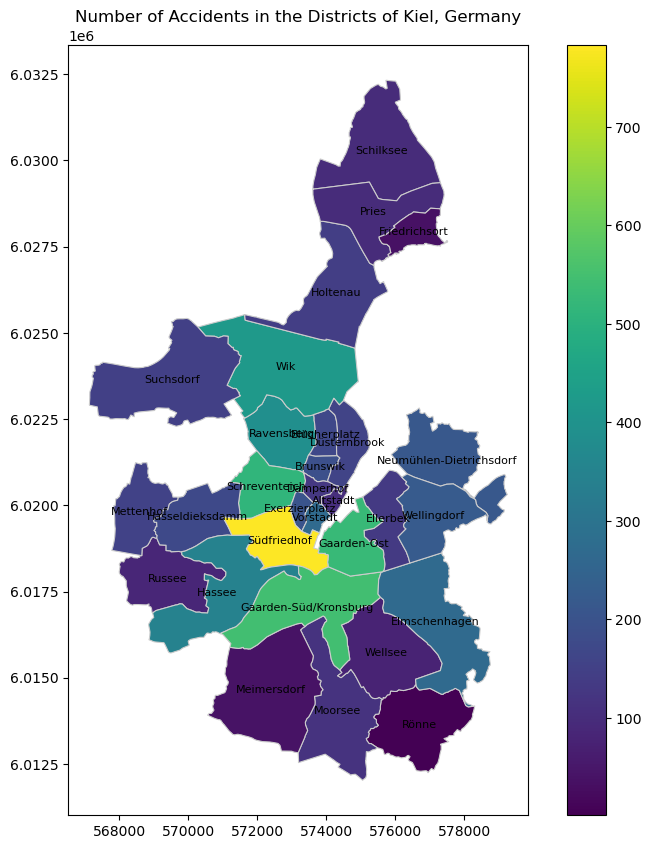

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Spatial join
points_in_polygons = gpd.sjoin(accidents_data, districts_data, op='within')

point_counts = points_in_polygons.groupby('index_right').size().reset_index(name='point_count')

polygons_with_counts = districts_data.merge(point_counts, left_index=True, right_on='index_right', how='left')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
polygons_with_counts.plot(column='point_count', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
for x, y, label in zip(polygons_with_counts.geometry.centroid.x, polygons_with_counts.geometry.centroid.y, polygons_with_counts['name']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

ax.set_title('Number of Accidents in the Districts of Kiel, Germany')
plt.show()


### Discussion on District of Kiel:
The high number of accidents occurred in the Districts of *Sudfriedhof*,*Gaarden-Ost*, and *Gaarden-Sud/ Kronsburg*. Although, other places are also not accident free but the frequencies are much lesser.

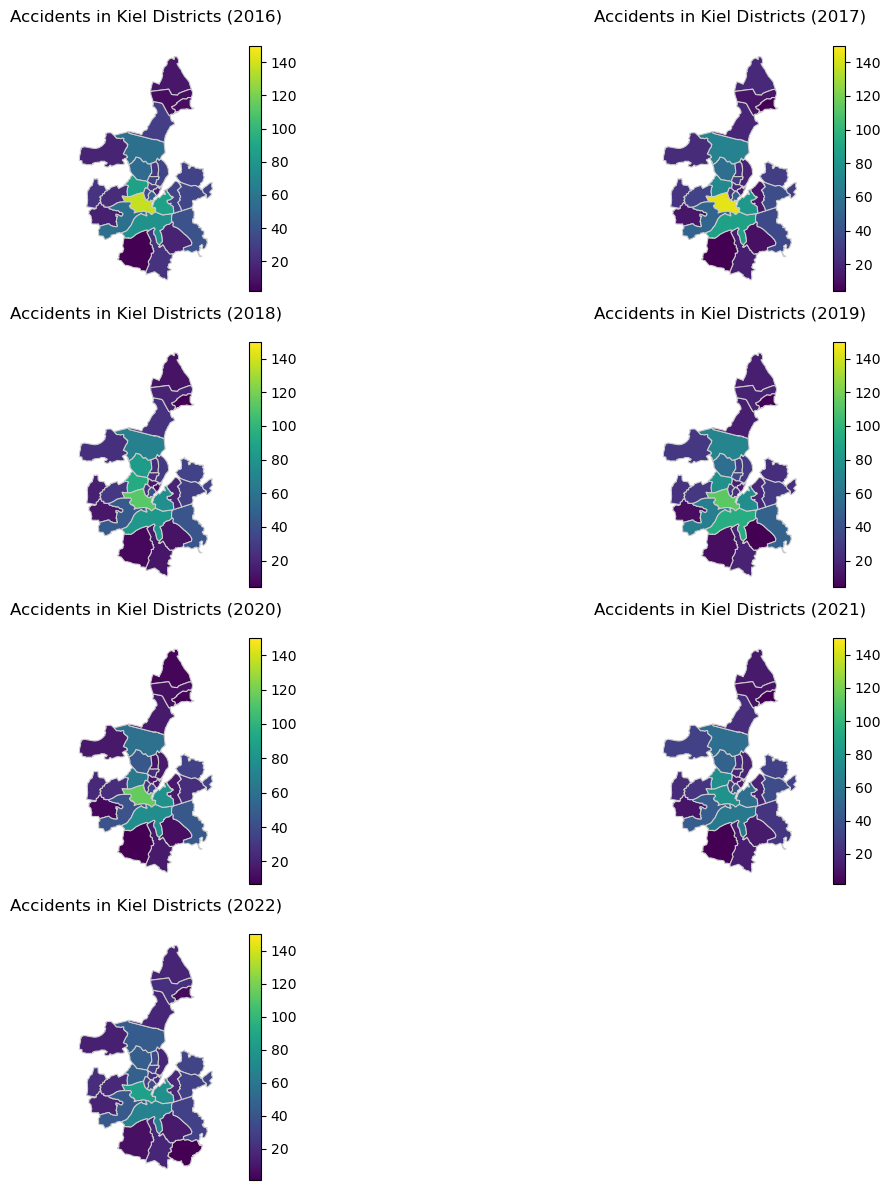

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt

def accidents_each_year(years):
    num_years = len(years)
    num_rows = num_years // 2 + num_years % 2 
    fig, axs = plt.subplots(num_rows, 2, figsize=(12, 12))
    axs = axs.flatten()

    for i, year in enumerate(years, start=1):
        accidents_data_year = accidents_data[accidents_data['year'] == year]
        points_in_polygons = gpd.sjoin(accidents_data_year, districts_data, op='within')
        point_counts = points_in_polygons.groupby('index_right').size().reset_index(name='point_count')
        polygons_with_counts = districts_data.merge(point_counts, left_index=True, right_on='index_right', how='left')
        plot = polygons_with_counts.plot(column='point_count', cmap='viridis', linewidth=0.8, ax=axs[i-1], edgecolor='0.8', legend=True, vmax=150)
        plot.set_title(f'Accidents in Kiel Districts ({year})')
        axs[i-1].set_axis_off()
    for j in range(num_years, len(axs)):
        fig.delaxes(axs[j])
    plt.tight_layout()
    plt.show()

accidents_each_year([2016, 2017, 2018, 2019, 2020, 2021, 2022])


### Discussion of Accidents in the District of Kiel over Time:
Over the time frame from 2016 to 2022, we can see the improvement in which the number of accidents decreased especially in the districts of *Sudfriedhof*

## Task 3:

    1) Time Series Visualization of number of accidents occuring in hours, week, month, and years.

C:\Users\AK traders\AppData\Local\Temp\ipykernel_29628\3702336271.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(month_counts.index, rotation=45, ha='right')  # Rotate x-axis labels


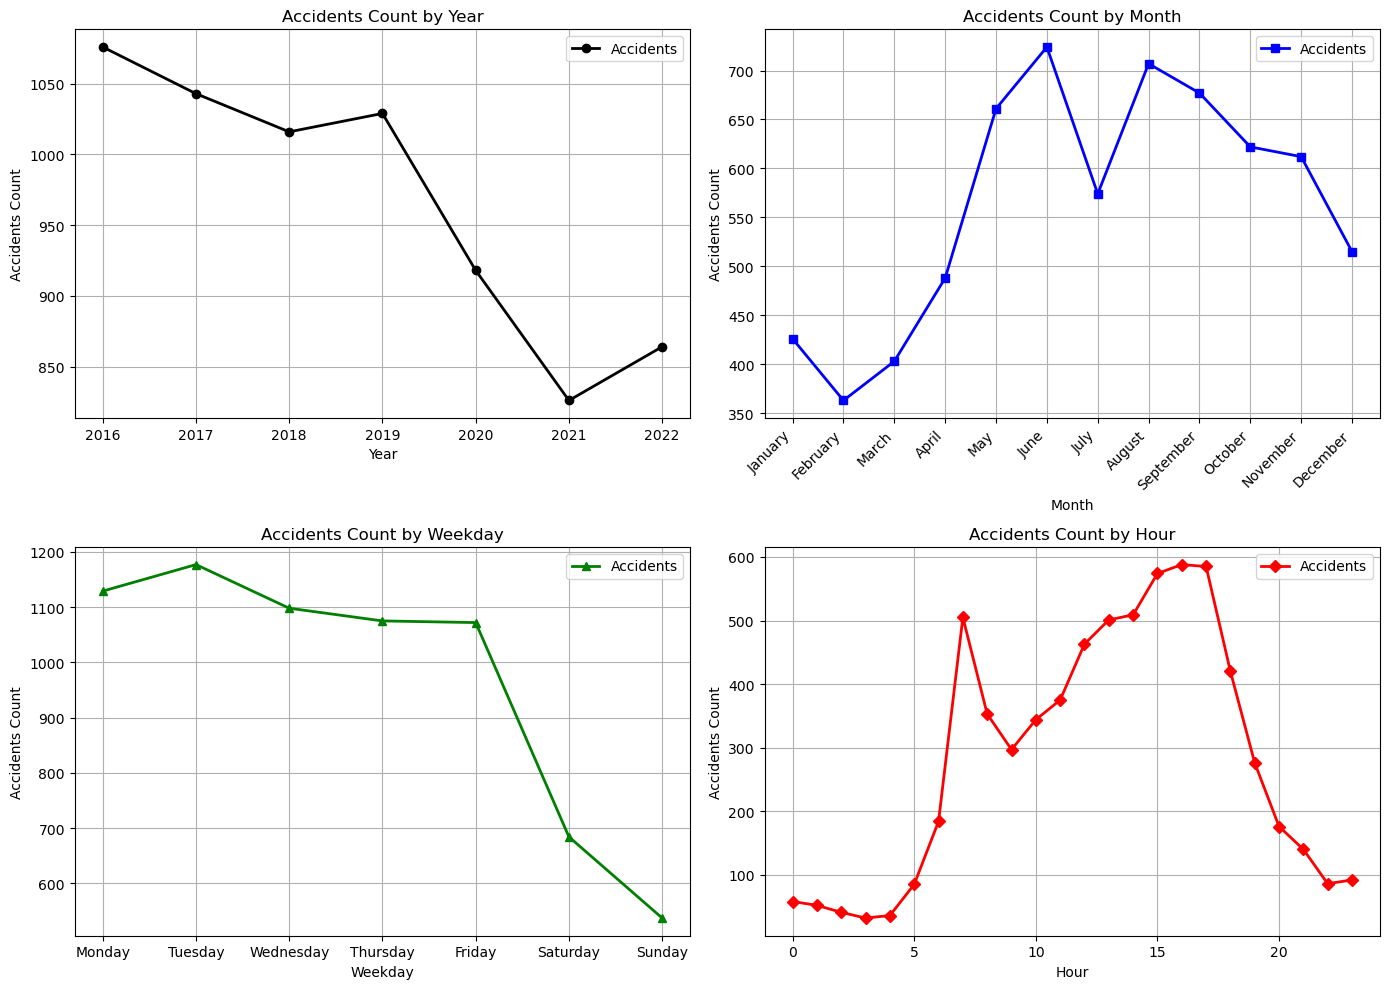

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot for 'year'
year_counts = accidents_data['year'].value_counts().sort_index()
axes[0, 0].plot(year_counts.index, year_counts, color='black', marker='o', linestyle='-', linewidth=2, label='Accidents')
axes[0, 0].set_title('Accidents Count by Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Accidents Count')
axes[0, 0].grid(True)
axes[0, 0].legend()

# Plot for 'month'
month_counts = accidents_data['month'].astype('category').cat.set_categories(calendar.month_name[1:], ordered=True).value_counts().sort_index()
axes[0, 1].plot(month_counts.index, month_counts, color='blue', marker='s', linestyle='-', linewidth=2, label='Accidents')
axes[0, 1].set_title('Accidents Count by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Accidents Count')
axes[0, 1].set_xticklabels(month_counts.index, rotation=45, ha='right')  # Rotate x-axis labels
axes[0, 1].grid(True)
axes[0, 1].legend()

# Plot for 'weekday'
weekday_counts = accidents_data['weekday'].astype('category').cat.set_categories(list(calendar.day_name), ordered=True).value_counts().sort_index()
axes[1, 0].plot(weekday_counts.index, weekday_counts, color='green', marker='^', linestyle='-', linewidth=2, label='Accidents')
axes[1, 0].set_title('Accidents Count by Weekday')
axes[1, 0].set_xlabel('Weekday')
axes[1, 0].set_ylabel('Accidents Count')
axes[1, 0].grid(True)
axes[1, 0].legend()

# Plot for 'hour'
hour_counts = accidents_data['hour'].value_counts().sort_index()
axes[1, 1].plot(hour_counts.index, hour_counts, color='red', marker='D', linestyle='-', linewidth=2, label='Accidents')
axes[1, 1].set_title('Accidents Count by Hour')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Accidents Count')
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout()
plt.show()


### Discussion on the Number of Accidents over time

*Years*: The number of accidents decrease from 2016 to 2021. However, we can see the little rise in accidents in 2022.

*Months*: An interesting pattern can be seen over the month in which the summer season has noticably higher accidents as compared to the winter season.

*Weekday*: Over the week, accidents are happening especially on weekdays from Monday to Friday then drastically decrease on Saturday and Sunday.

*Hours*: Peak hours of accidents mainly occurred during 7am in the morning then another peaks occur between 15:00 to 17:00.

## Task 4

           1) Percentage Distribution of the types of accidents

In [71]:
# Unique types of accidents
print ('Type 1: ',accidents_data['type1'].unique(),'\n','\n')
print ('Type 2:',accidents_data['type2'].unique())

Type 1:  ['Collision between vehicle and pedestrian'
 'Collision with another vehicle moving laterally in the same direction'
 'Collision with another vehicle which starts, stops or is stationary'
 'Collision with another vehicle which turns into or crosses a road'
 'Accident of another kind' 'Leaving the carriageway to the left'
 'Collision with another vehicle moving ahead or waiting'
 'Collision with another oncoming vehicle'
 'Leaving the carriageway to the right'
 'Collision with an obstacle in the carriageway'] 
 

Type 2: ['Accident caused by crossing the road'
 'Accident between vehicles moving along in carriageway'
 'Accident involving stationary'
 'Accident caused by turning into a road or by crossing it'
 'Driving accident' 'Accident caused by turning off the road'
 'Other accident']


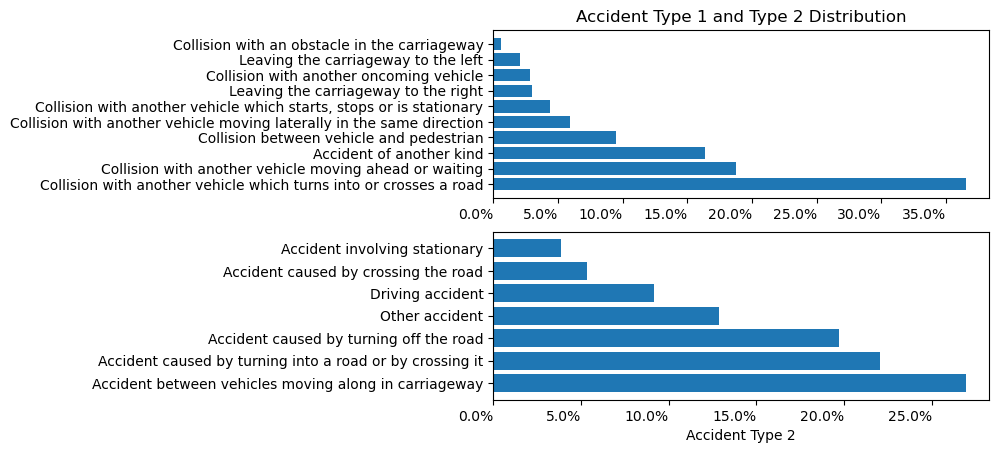

In [69]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.subplot(2, 1, 1)
type_counts = accidents_data['type1'].value_counts()/accidents_data['type1'].count() *100

# Plotting the bar chart
plt.barh(type_counts.index, type_counts)
plt.title('Accident Type 1 and Type 2 Distribution')
plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter())
plt.xticks(rotation=0,ha='right')
plt.subplot(2,1,2)
type_counts = accidents_data['type2'].value_counts()/accidents_data['type2'].count() *100

# Plotting the bar chart
plt.barh(type_counts.index, type_counts)
plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter())
plt.xlabel('Accident Type 2')
plt.xticks(rotation=0,ha='right')
plt.show()


### Discussion of the Types of Accidents
The collision type *Collision with another vehicle which turns into or crosses a road* has the over 35% accidents out of total. For the type 2, *Accidents between vehicles moving along in carriageway* has over 25% accidents.

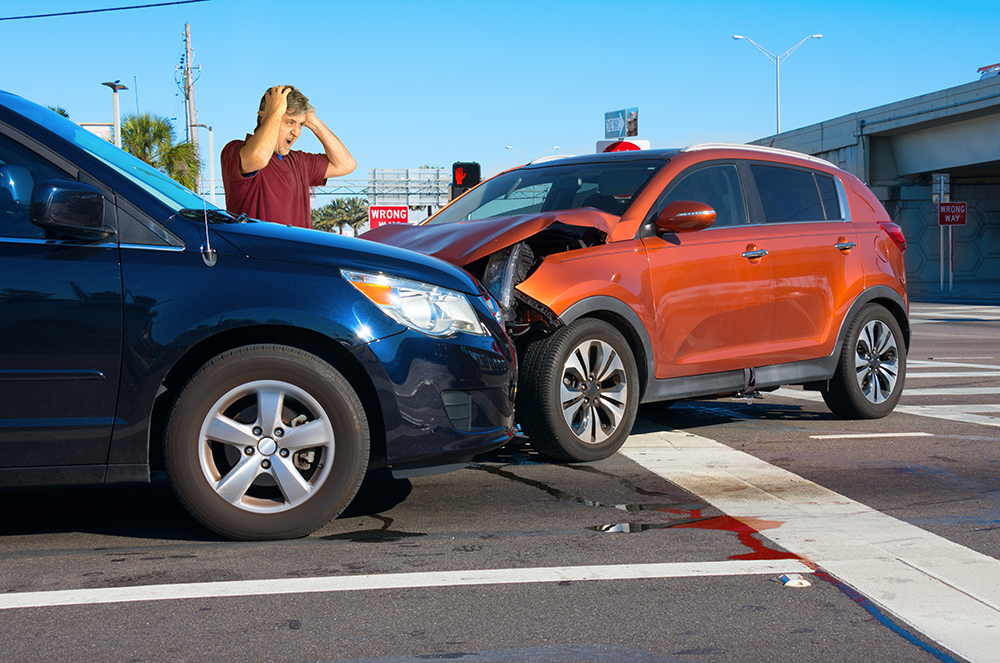
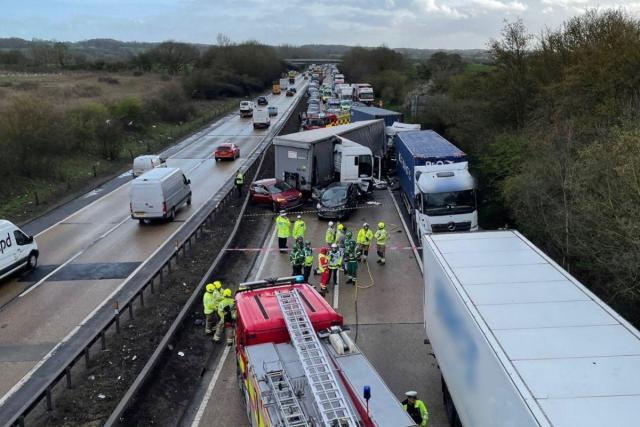

## Task 5
    1) Relationship between the different Types of Accidents

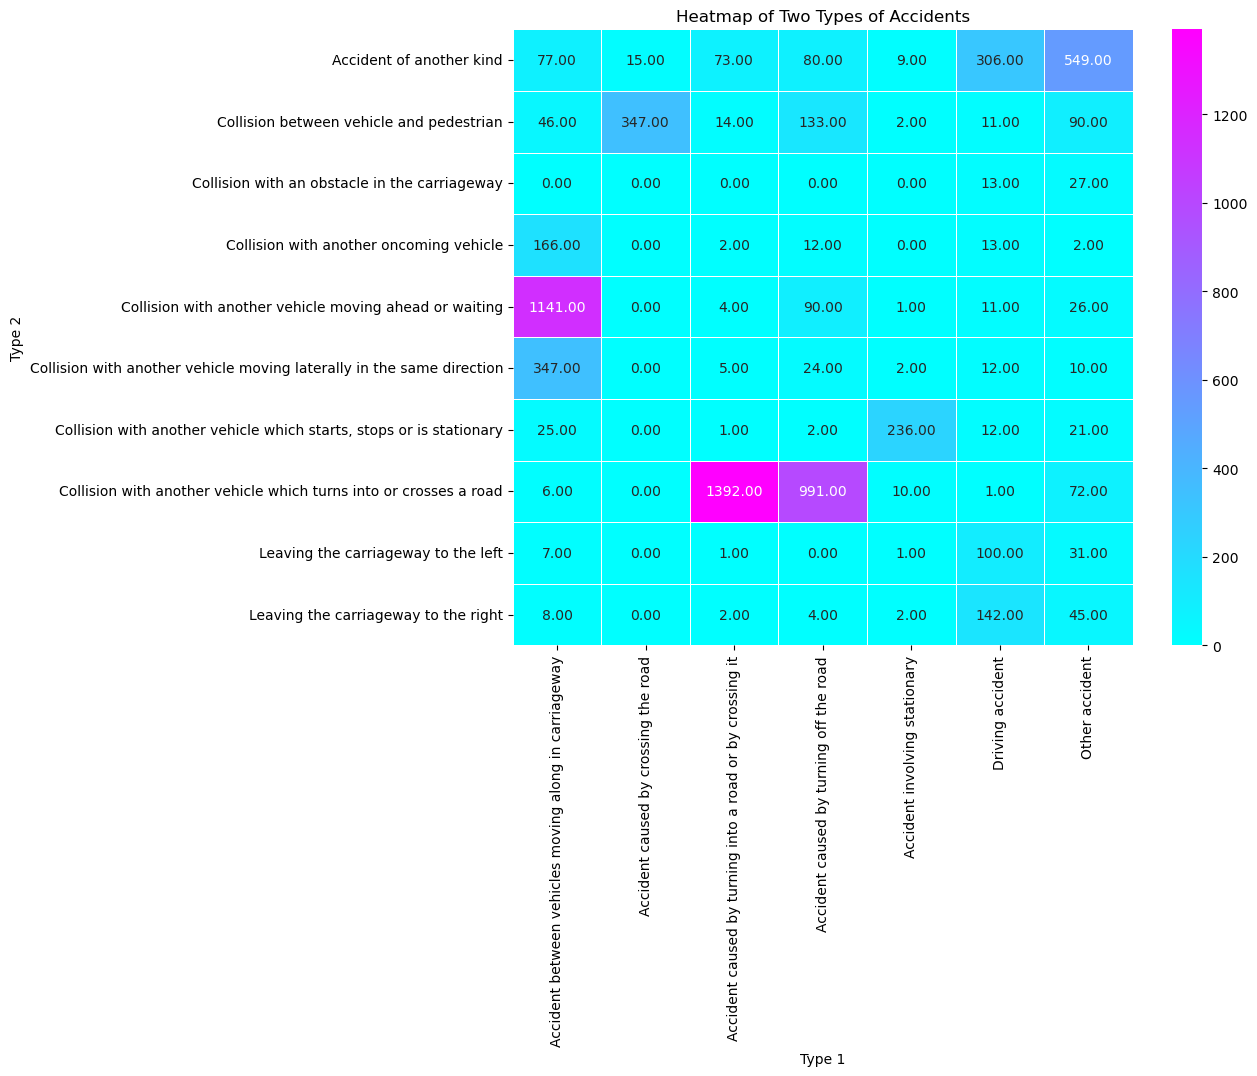

In [73]:
grouped_data = accidents_data.groupby(['type1', 'type2']).count()
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table
pivot_table = grouped_data.pivot_table(index='type1', columns='type2', values='year')
# Replace NaN values with 0
pivot_table = pivot_table.fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='cool', fmt='.2f', linewidths=.5)
plt.xlabel('Type 1')
plt.ylabel('Type 2')
plt.title('Heatmap of Two Types of Accidents')
plt.show()


### Discussion of the Relationship amongs Types
In type 2 that is *Collision with another vehicle moving ahead or waiting* has highly correlated with the type 1 *Accident between vehicles moving along in carriageway*. Also, *Collision with another vehicle which turns into or crosses a road* is linked with *Accident casused by turning into a road or by crossing it* & *Accident casued by turning off the road*.

On the other side, *Accident caused by crossing the road* has almost nothing link with the Type 2. 

## Task 6
    1) Relation between the high frequecies of Type 1 and Type 2 with the District of Kiel

Text(0, 0.5, 'Major/Danger Districts')

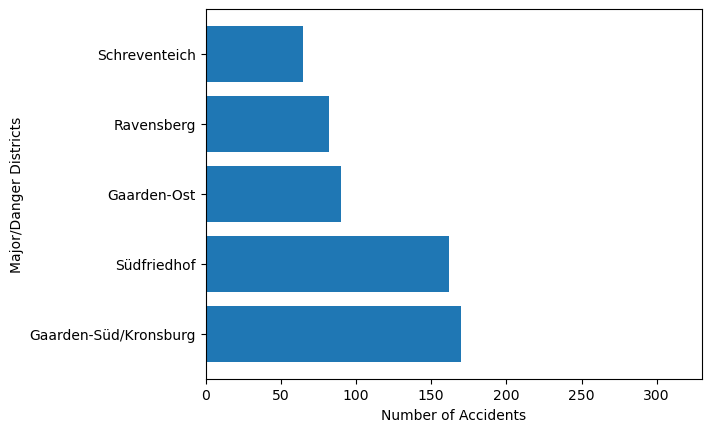

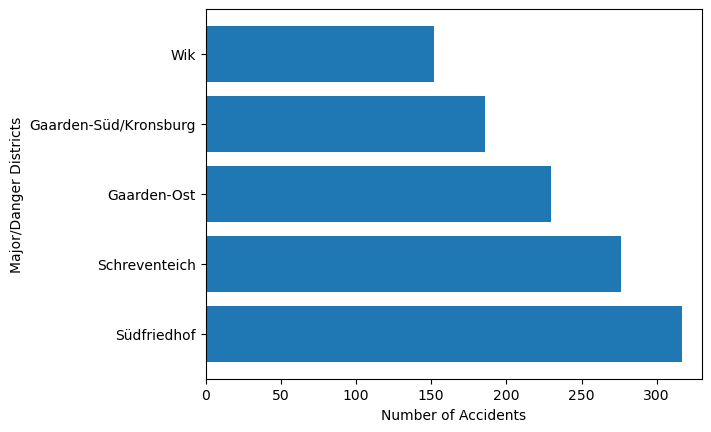

In [74]:
import matplotlib.pyplot as plt

accident_data1 = accidents_data[
    (accidents_data['type1'] == 'Collision with another vehicle moving ahead or waiting') &
    (accidents_data['type2'] == 'Accident between vehicles moving along in carriageway')
]

points_in_polygons = gpd.sjoin(accident_data1, districts_data,how='left', op='within')
AA = points_in_polygons['name'][points_in_polygons['index_right'] >= 0].value_counts().head(5)
plt.barh(AA.index,AA)
plt.xlim(0,330)
plt.xlabel('Number of Accidents')
plt.ylabel('Major/Danger Districts')
#*******************************************************************************************
plt.figure(2)
accident_data2 = accidents_data[
    (accidents_data['type1'] == 'Collision with another vehicle which turns into or crosses a road') &
    (accidents_data['type2'] == 'Accident caused by turning into a road or by crossing it') |
    (accidents_data['type2'] == 'Accident caused by turning off the road')
]
points_in_polygons = gpd.sjoin(accident_data2, districts_data,how='left', op='within')
AA = points_in_polygons['name'][points_in_polygons['index_right'] >= 0].value_counts().head(5)

plt.barh(AA.index,AA)
plt.xlim(0,330)
plt.xlabel('Number of Accidents')
plt.ylabel('Major/Danger Districts')


### Discussion
Under the condition that is,

         accidents_data[
    (accidents_data['type1'] == 'Collision with another vehicle moving ahead or waiting') &
    (accidents_data['type2'] == 'Accident between vehicles moving along in carriageway')
    ]
Gaarden-Sud/kronburg and Sudfriedof have the highest number of accidents of the above types.

However, for the condition

        accidents_data[
    (accidents_data['type1'] == 'Collision with another vehicle which turns into or crosses a road') &
    (accidents_data['type2'] == 'Accident caused by turning into a road or by crossing it') |
    (accidents_data['type2'] == 'Accident caused by turning off the road')
    ]
Sudfriedhof and Schreventeich have higest number of accidents considering the above types.

## Conclusion:
Over the time, we can notice the number of accidents occuring in Kiel deceasing in large amount. However, if we take notice and strong action in the District of *Sudfriedhof* it would decrease more. Also, the Summer season has the highest frequencies due to the number of tourist arrival. On the weekdays from Monday to Friday especially the working hours from 07:00 to 17:00 to number of accidents increase. These could be control if we consider some precautions on the *Collision with another vehicle moving ahead or waiting* with *Accident between vehicles moving along in carriageway*, and *Collision with another vehicle which turns into or crosses a road* under the scenerios of *Accident caused by turning into a road or by crossing it* & *Accident caused by turning off the road*.